# 20210828 Initial Analysis

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.analysis import plot_redu

from imaka.reduce import util
from astropy.stats import sigma_clipped_stats

## Edit Me
from imaka.reduce.nights import reduce_2021_08_28 as redu
night = '20210828'
fld = 'Fld2'

root_dir = redu.root_dir
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
## Had an issue with stacking, the gfol
for key in list(redu.dict_images.keys()):
    for i in range(len(redu.dict_images[key])):
        img_num = redu.dict_images[key]
        suf = redu.dict_suffix[key]
        test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)
        
        stars = Table.read(root_dir + f'reduce/{fld}/' + test_img_base + '_clean_stars_stats_mdp.fits')
        print(f"key: {key} image {img_num[i]} stars: {len(stars)}")  

key: LS_IVBR image 12 stars: 2390
key: LS_IVBR image 15 stars: 2447
key: LS_IVBR image 18 stars: 2736
key: LS_IVBR image 21 stars: 2921
key: LS_IVBR image 24 stars: 2262
key: LS_IVBR image 27 stars: 2531
key: LS_IVBR image 30 stars: 2099
key: LS_IVBR image 33 stars: 2765
key: LS_IVBR image 37 stars: 2785
key: docz_IVBR image 13 stars: 2610
key: docz_IVBR image 16 stars: 2276
key: docz_IVBR image 19 stars: 2512
key: docz_IVBR image 22 stars: 2537
key: docz_IVBR image 25 stars: 2526
key: docz_IVBR image 28 stars: 2667
key: docz_IVBR image 31 stars: 2635
key: docz_IVBR image 34 stars: 2713
key: docz_IVBR image 38 stars: 2878
key: open_IVBR image 14 stars: 1362
key: open_IVBR image 17 stars: 1379
key: open_IVBR image 20 stars: 883
key: open_IVBR image 26 stars: 1294
key: open_IVBR image 29 stars: 693
key: open_IVBR image 32 stars: 1015
key: open_IVBR image 35 stars: 916
key: open_IVBR image 39 stars: 1152
key: tt_IVBR image 36 stars: 1788
key: tt_IVBR image 40 stars: 1577
key: LS_VBRI imag

# Single Image plots

In [7]:
# pick a file based on key
key = 'open_IVBR'
i=1
###
img_num = redu.dict_images[key]
suf = redu.dict_suffix[key]
test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)

50% EE radius = 0.400"


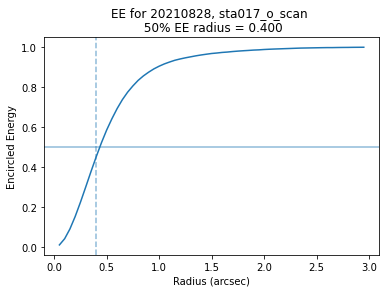

In [8]:
plot_redu.plot_ee_50(test_img_base, root_dir, fld, night)

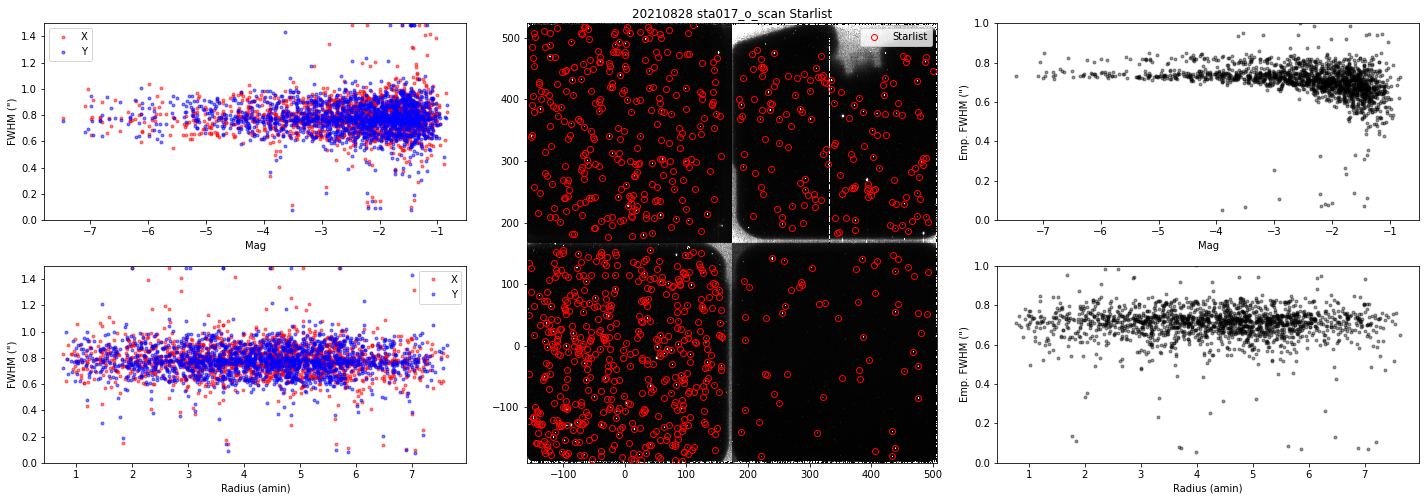

x: fwhm_x_avg = 0.78" fwhm_x_med = 0.78" fwhm_x_std = 0.10"
x: fwhm_x_avg = 0.78" fwhm_x_med = 0.78" fwhm_x_std = 0.10"


In [9]:
plot_redu.plot_starlist_stats(test_img_base, root_dir, fld, night)

NOTE: extra stars on top edge and low edges here look like noise. Filtering starlists is advised

# STATS

## Moffat profile

In [7]:
stats = Table.read(root_dir + 'reduce/stats/stats_LS_IVBR.fits')

In [11]:
reload(plot_redu)

<module 'imaka.analysis.plot_redu' from '/u/eden/code/imaka/imaka/analysis/plot_redu.py'>

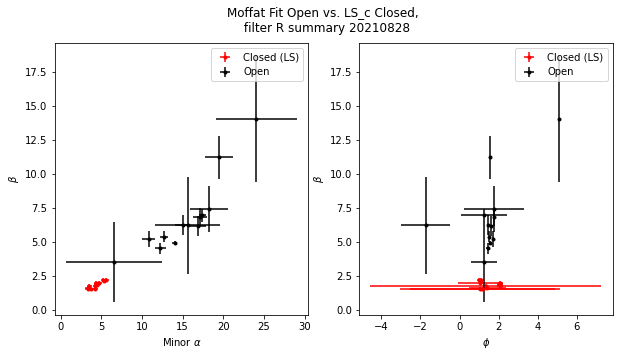

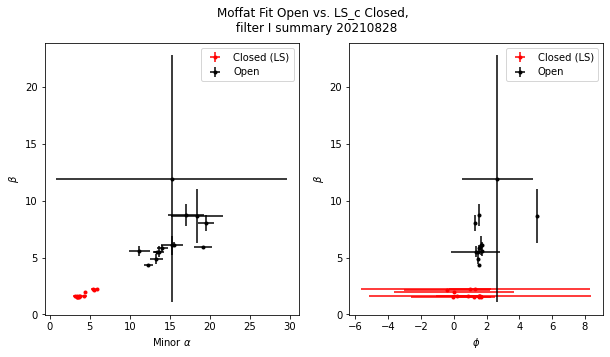

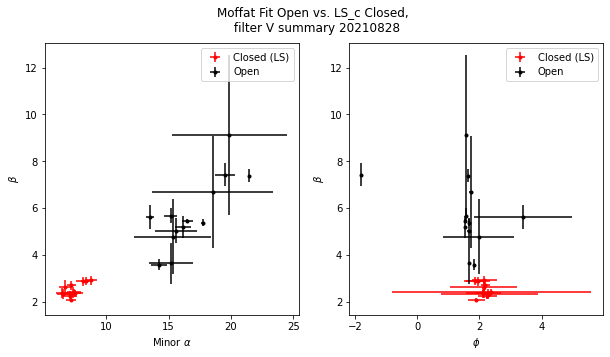

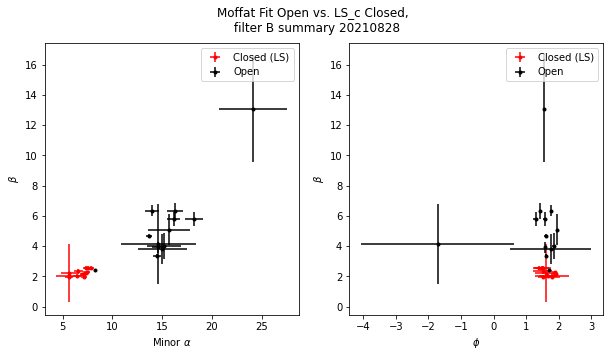

In [12]:
c_key = "LS_c"
plot_redu.plot_moffat_fit_4F("R", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("I", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("V", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("B", root_dir, c_key, fld, night)

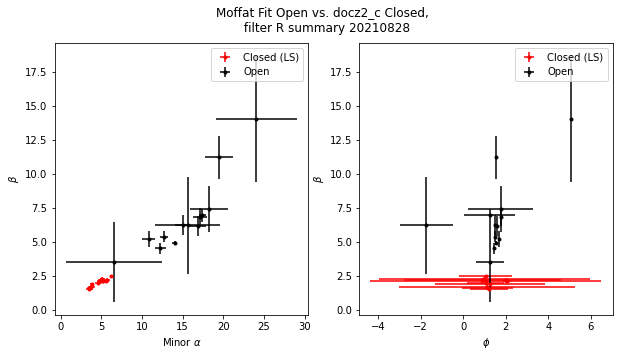

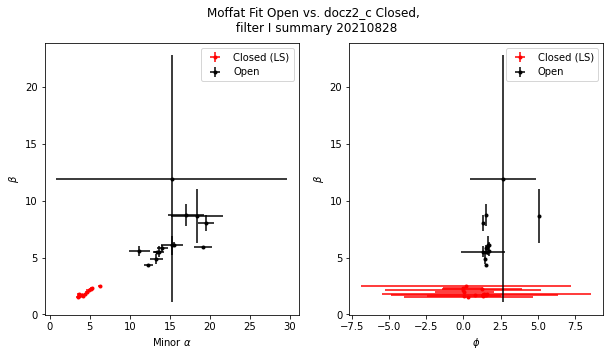

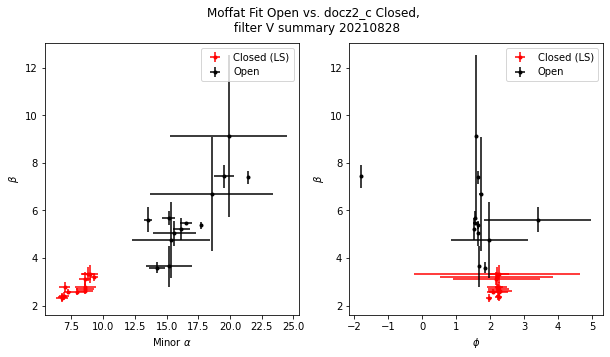

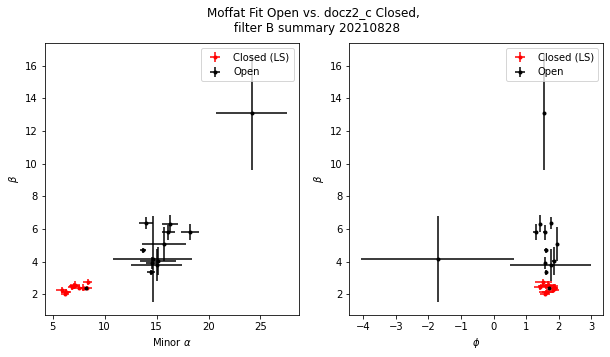

In [13]:
c_key = "docz2_c"
plot_redu.plot_moffat_fit_4F("R", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("I", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("V", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("B", root_dir, c_key, fld, night)

## Stats Stacking

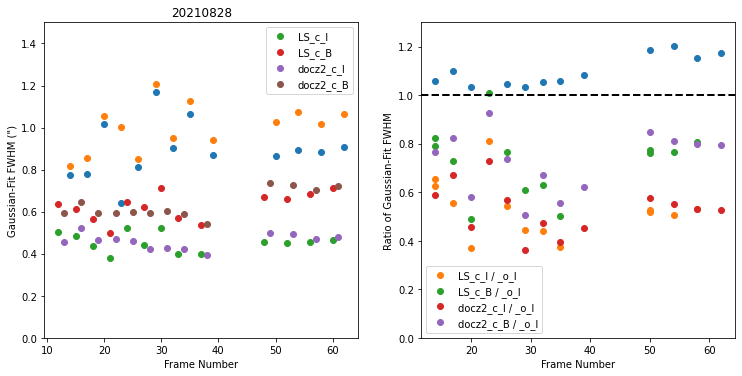

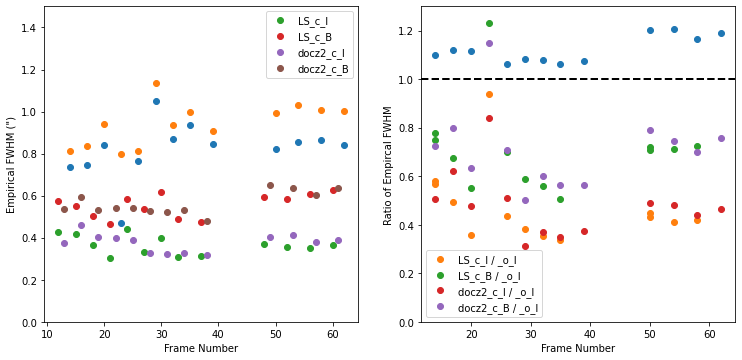

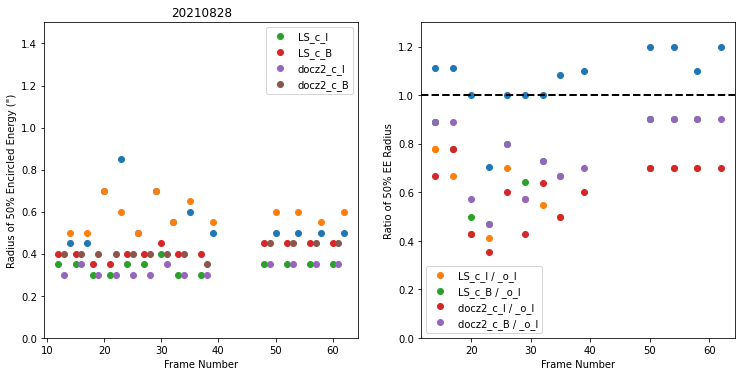

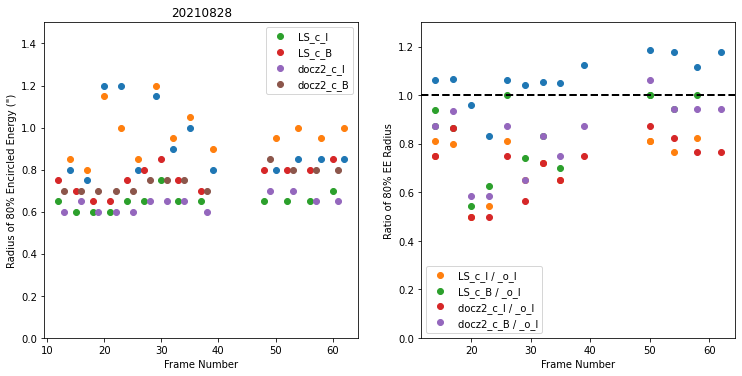

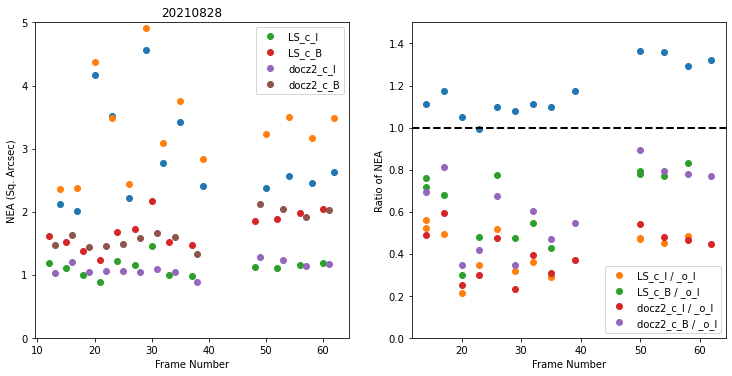

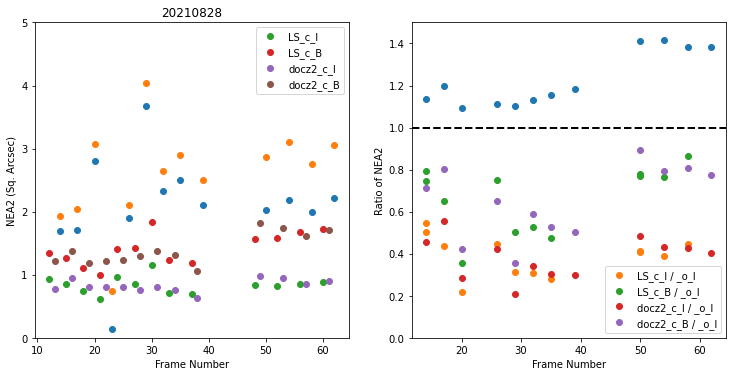

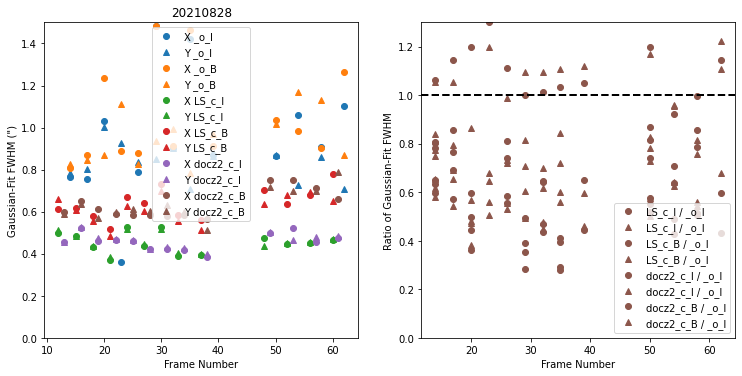

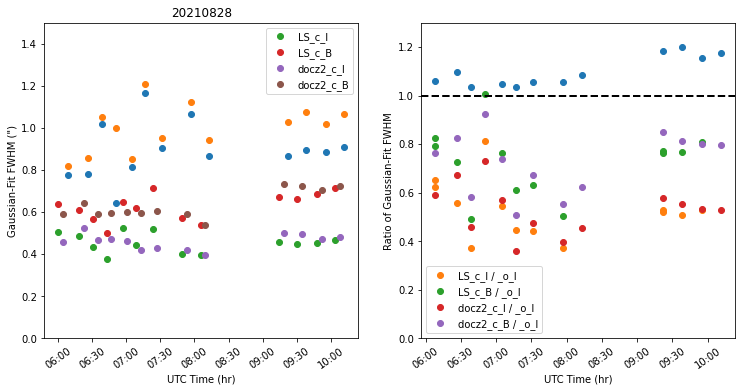

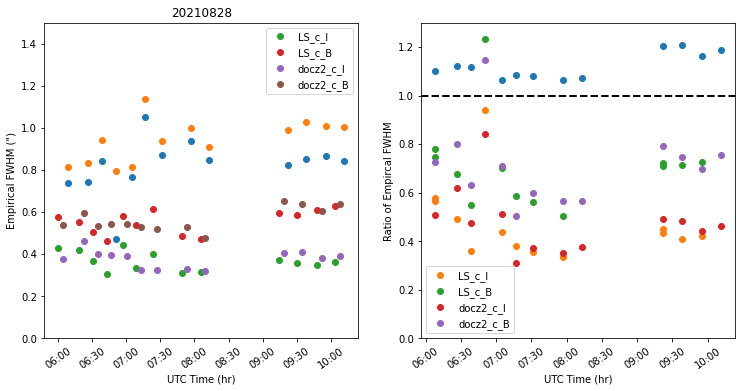

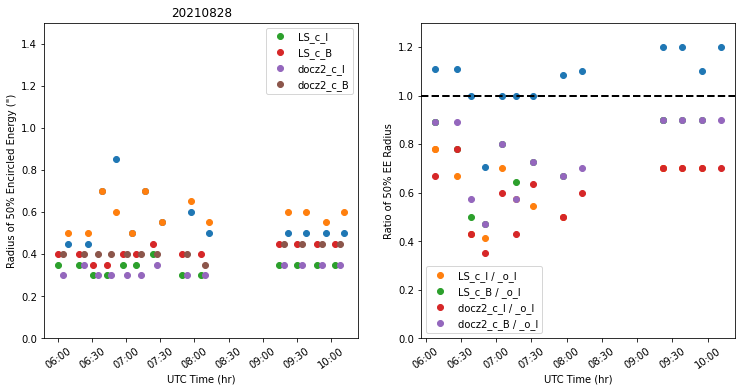

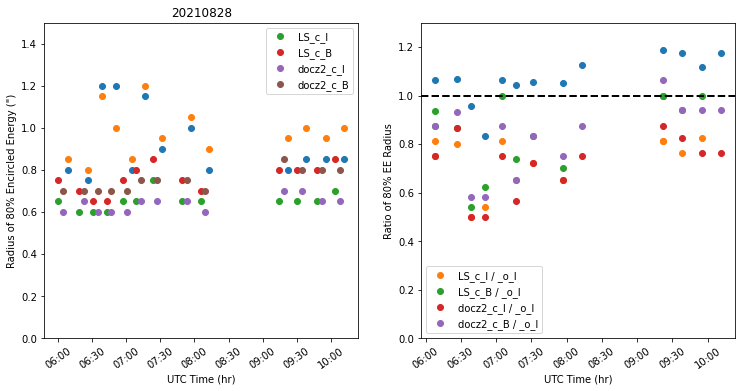

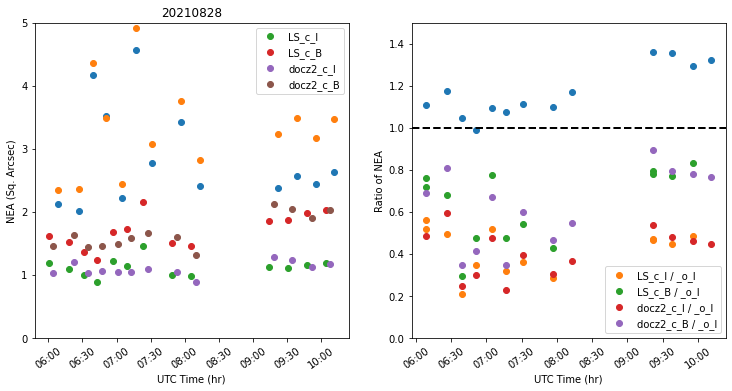

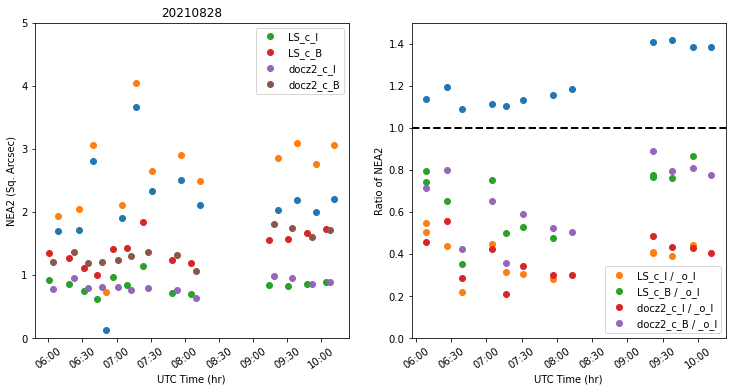

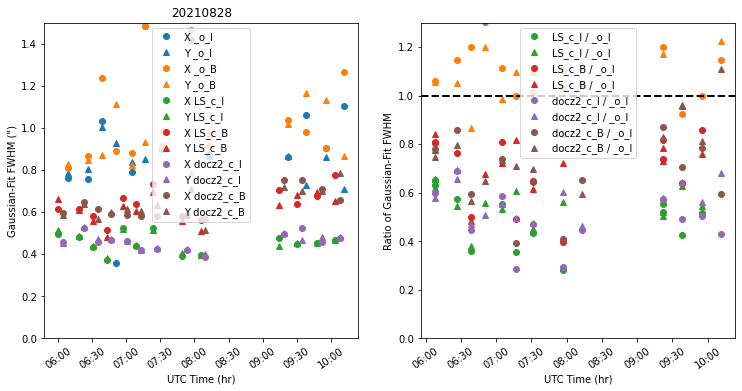

In [14]:
## Must have completed stats
suffixes = list(redu.dict_suffix.keys())
suffixes = ['_o_I', '_o_B', 'LS_c_I', 'LS_c_B', 'docz2_c_I', 'docz2_c_B']
plot_stats.plot_stack_stats(night, suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')
plt.show()

# Time Variation w/MASS-DIMM

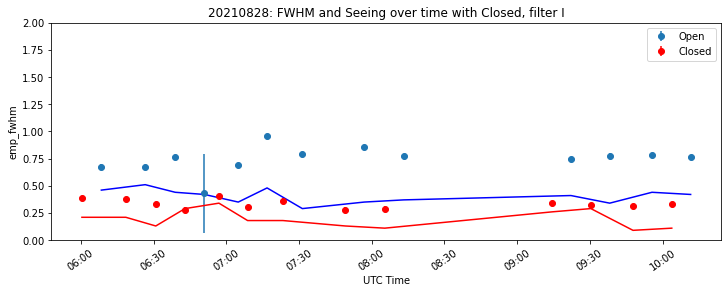

In [15]:
filt = "I"
wav = 806

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

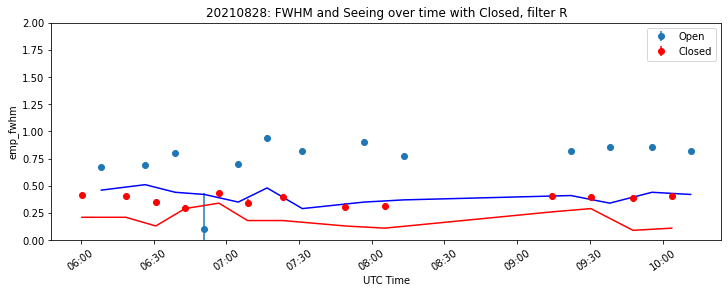

In [16]:
filt = "R"
wav = 658

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

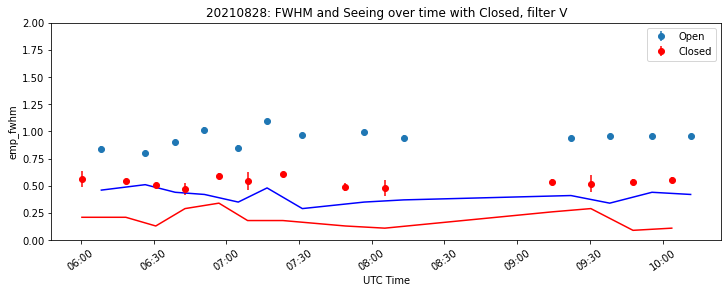

In [17]:
filt = "V"
wav = 551

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

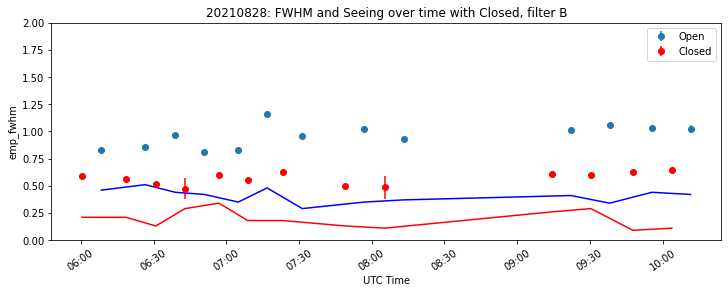

In [18]:
filt = "B"
wav = 445

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

# Aggregate Plots

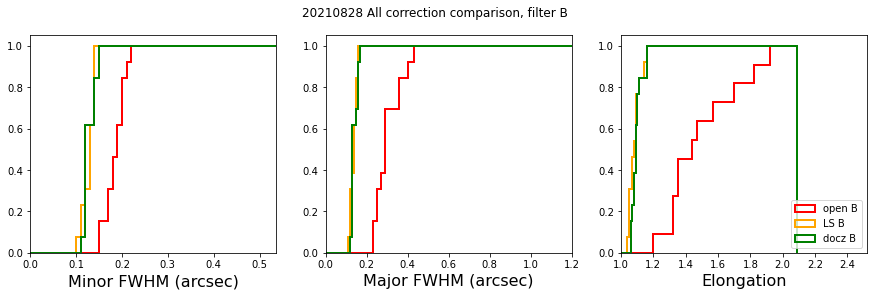

In [19]:
f_band = "B"

files = [f"{stats_dir}stats__o_{f_band}_mdp.fits", f"{stats_dir}stats_LS_c_{f_band}_mdp.fits", f"{stats_dir}stats_docz2_c_{f_band}_mdp.fits"]
labels = ['open '+ f_band, 'LS ' + f_band, 'docz ' + f_band]
colors = ['red', 'orange', 'green', 'blue', 'lightgreen', 'cyan']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All correction comparison, filter {f_band}")
plt.show()

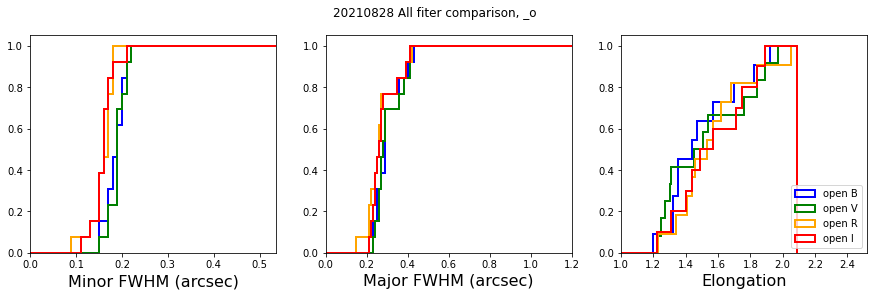

In [20]:
suff = "_o"

files = [f"{stats_dir}stats_{suff}_B_mdp.fits", f"{stats_dir}stats_{suff}_V_mdp.fits", f"{stats_dir}stats_{suff}_R_mdp.fits",f"{stats_dir}stats_{suff}_I_mdp.fits"]
labels = ['open B', 'open V', 'open R', 'open I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

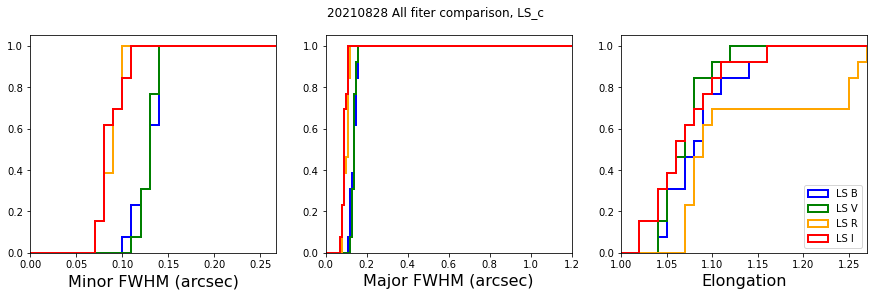

In [21]:
suff = "LS_c"

files = [f"{stats_dir}stats_{suff}_B_mdp.fits", f"{stats_dir}stats_{suff}_V_mdp.fits", f"{stats_dir}stats_{suff}_R_mdp.fits",f"{stats_dir}stats_{suff}_I_mdp.fits"]
labels = ['LS B', 'LS V', 'LS R', 'LS I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

# Four Filter Analysis

In [22]:
from imaka.analysis import fourfilt
root = stats_dir

files_c = [root+"stats_LS_c_B.fits", root+"stats_LS_c_V.fits", root+"stats_LS_c_R.fits", root+"stats_LS_c_I.fits"]
files_o = [root+"stats__o_B.fits", root+"stats__o_V.fits", root+"stats__o_R.fits", root+"stats__o_I.fits"]

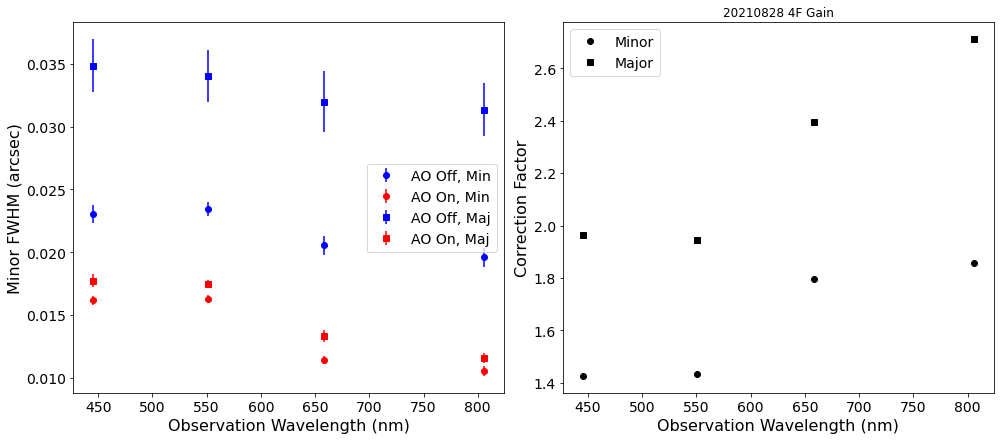

In [23]:
fourfilt.plot_gain(files_o, files_c) 
plt.title(f"{night} 4F Gain")
plt.show()

χ$^2$=5.58
χ$^2$=59.09
α=0.31
α=0.82


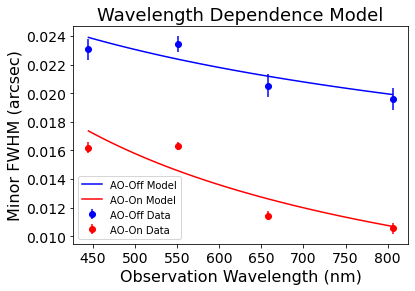

In [24]:
fourfilt.power_model(files_o, files_c)

# Field Variability

In [21]:
from importlib import reload
reload(plot_stats)

<module 'imaka.analysis.plot_stats' from '/u/eden/code/imaka/imaka/analysis/plot_stats.py'>

### Closed loop, single exposure

sta017_o_scan
Median FWHM           = 0.608"
Median FWHM (clipped) = 0.608"
Mean FWHM             = 0.620"
Mean FWHM (clipped)   = 0.620"
Stddev FWHM           = 0.069"
Stddev FWHM (clipped) = 0.043"


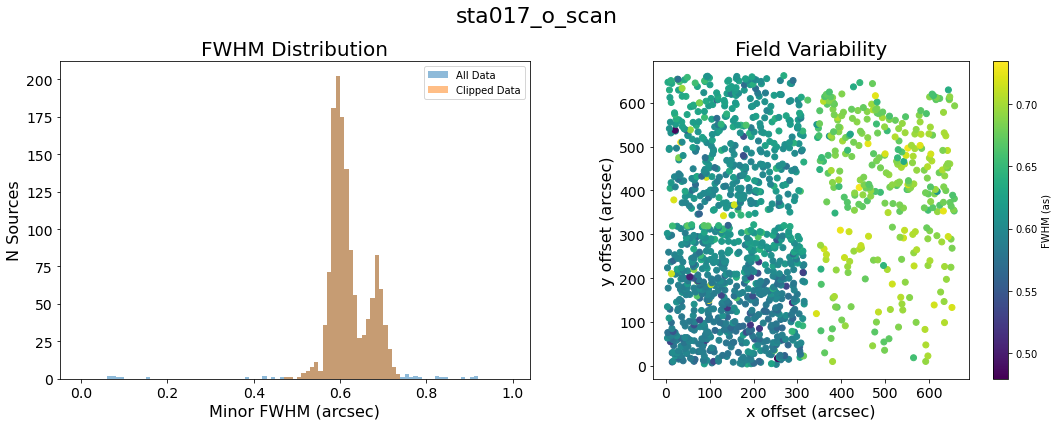

In [25]:
print(test_img_base)
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, test_img_base)

### Open Loop

Median FWHM           = 0.629"
Median FWHM (clipped) = 0.629"
Mean FWHM             = 0.672"
Mean FWHM (clipped)   = 0.642"
Stddev FWHM           = 0.754"
Stddev FWHM (clipped) = 0.053"


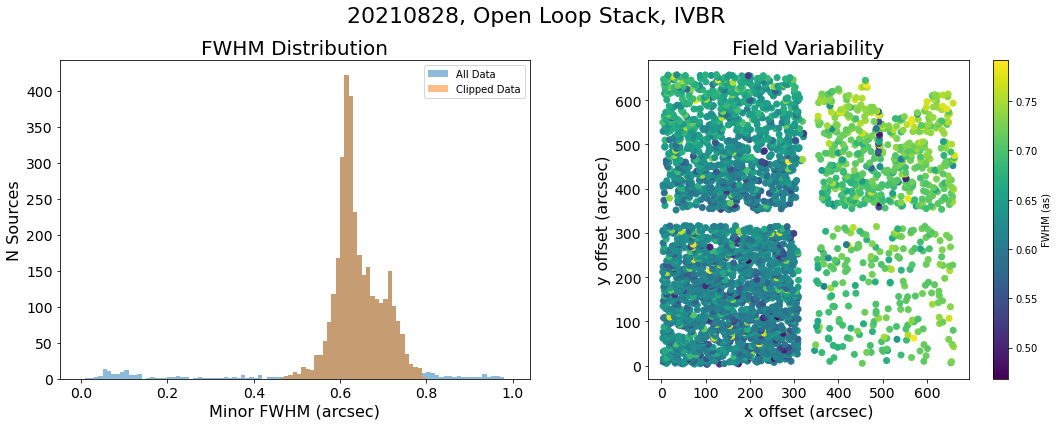

In [29]:
filt = 'IVBR'
img_file = stack_dir + f'fld2_stack__o_{filt}.fits' 
starlist = stack_dir + f'fld2_stack__o_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Open Loop Stack, {filt}")

Median FWHM           = 0.698"
Median FWHM (clipped) = 0.699"
Mean FWHM             = 0.727"
Mean FWHM (clipped)   = 0.712"
Stddev FWHM           = 0.717"
Stddev FWHM (clipped) = 0.060"


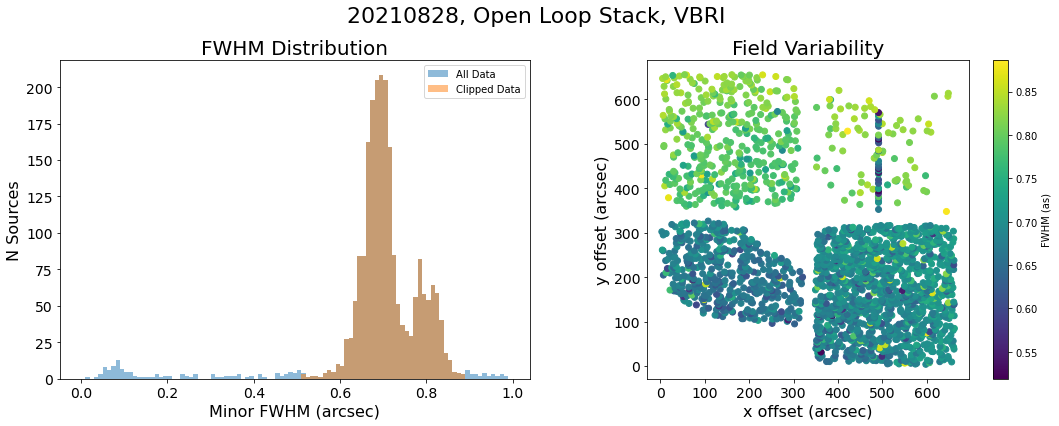

In [30]:
filt = 'VBRI'
img_file = stack_dir + f'fld2_stack__o_{filt}.fits' 
starlist = stack_dir + f'fld2_stack__o_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Open Loop Stack, {filt}")

### Closed (LS)

Median FWHM           = 0.367"
Median FWHM (clipped) = 0.366"
Mean FWHM             = 0.778"
Mean FWHM (clipped)   = 0.376"
Stddev FWHM           = 4.547"
Stddev FWHM (clipped) = 0.069"


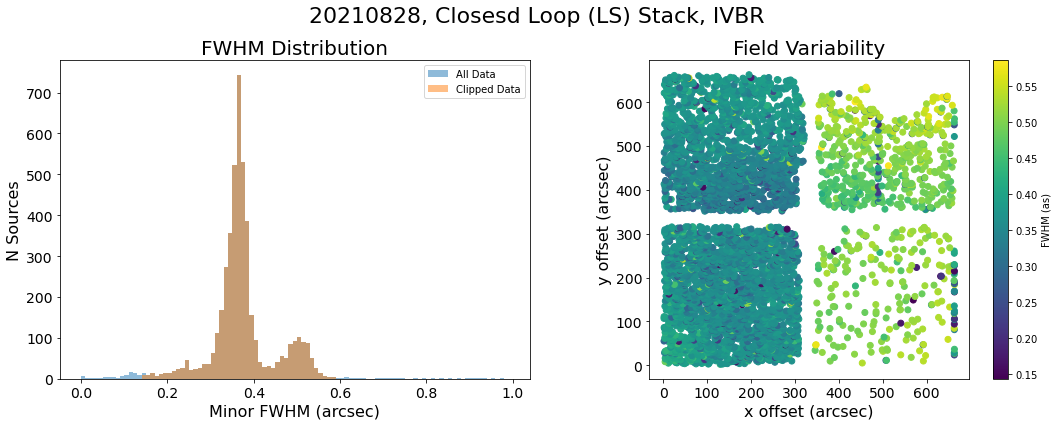

In [31]:
filt = 'IVBR'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closesd Loop (LS) Stack, {filt}")

Median FWHM           = 0.381"
Median FWHM (clipped) = 0.381"
Mean FWHM             = 0.507"
Mean FWHM (clipped)   = 0.396"
Stddev FWHM           = 4.990"
Stddev FWHM (clipped) = 0.066"


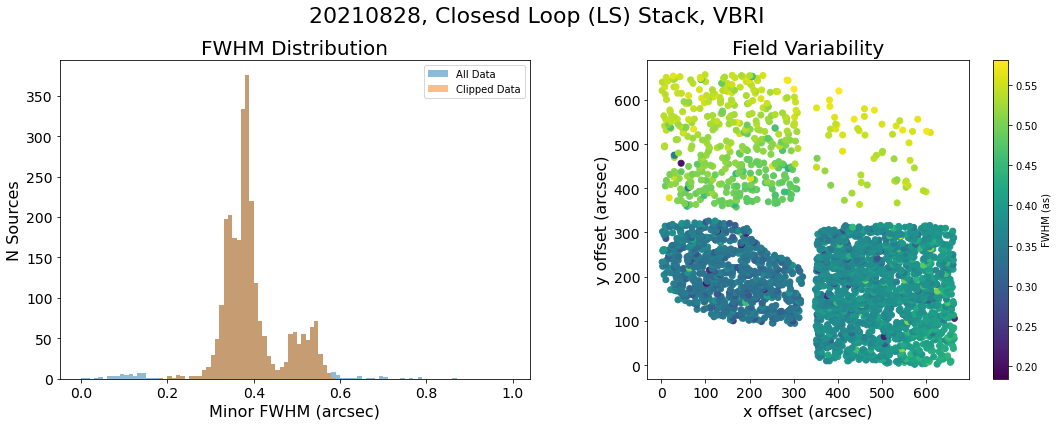

In [32]:
filt = 'VBRI'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closesd Loop (LS) Stack, {filt}")

### Closed (docz2)

Median FWHM           = 0.372"
Median FWHM (clipped) = 0.372"
Mean FWHM             = 0.425"
Mean FWHM (clipped)   = 0.387"
Stddev FWHM           = 0.812"
Stddev FWHM (clipped) = 0.060"


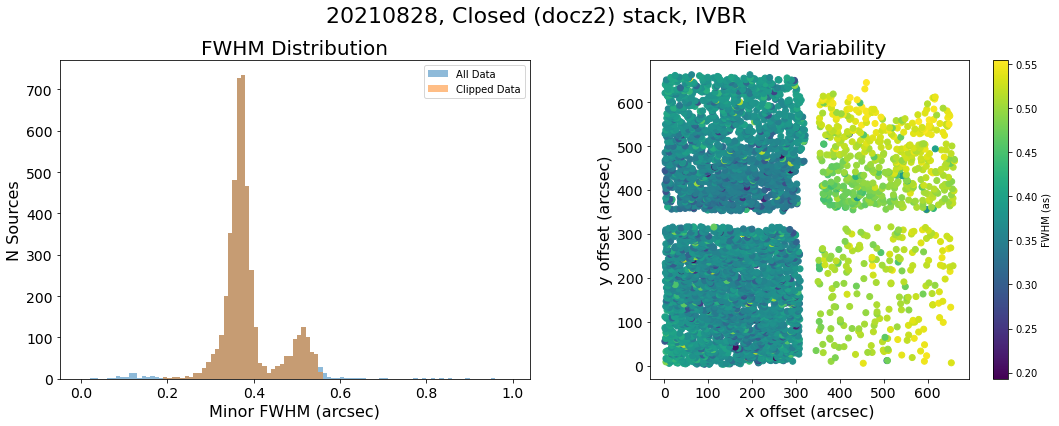

In [33]:
filt = 'IVBR'
img_file = stack_dir + f'fld2_stack_docz2_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_docz2_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (docz2) stack, {filt}")

Median FWHM           = 0.417"
Median FWHM (clipped) = 0.417"
Mean FWHM             = 0.451"
Mean FWHM (clipped)   = 0.431"
Stddev FWHM           = 0.355"
Stddev FWHM (clipped) = 0.069"


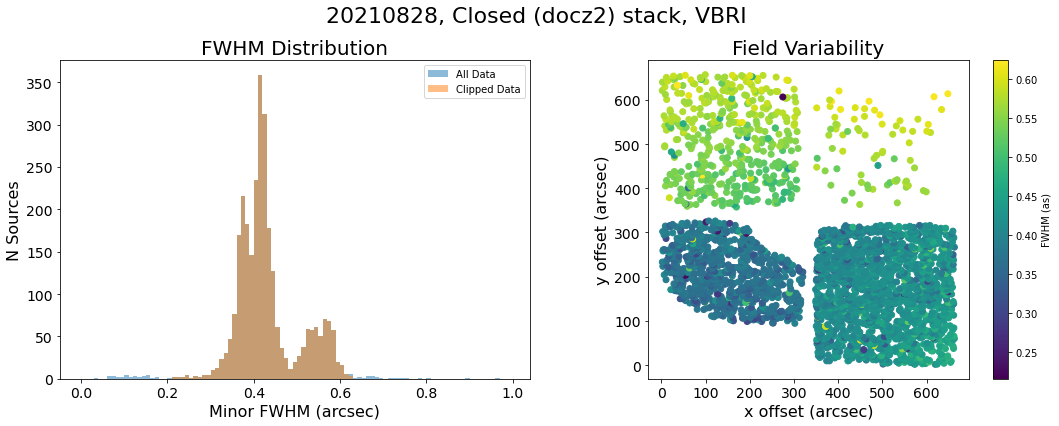

In [34]:
filt = 'VBRI'
img_file = stack_dir + f'fld2_stack_docz2_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_docz2_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (docz2) stack, {filt}")

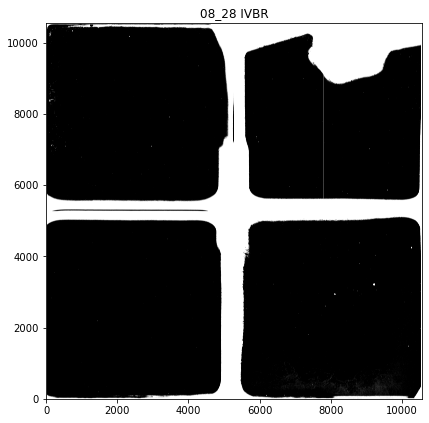

In [35]:
## What masks are we using? how are they different between orientations?
mask_dir = root_dir + "reduce/calib/"

hdul = fits.open(mask_dir +  "mask_IVBR.fits")

data = hdul[0].data

fig = plt.figure(figsize=(6,6))
plt.title("08_28 IVBR")
im = plt.imshow(data, origin ='lower', cmap='gray')
#plt.colorbar(im)
plt.tight_layout()
plt.show()
hdul.close()